# Importer le CSV

In [1]:
# Librairies de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
file_path = '~/Desktop/projet_la/bdd/bdd.csv'

# Essai avec l'encodage 'latin1'
df = pd.read_csv(file_path, sep=';', encoding='UTF-8-SIG', low_memory=False)

df.head()

,idVisit,visitorId,fingerprint,type (actionDetails 0),url (actionDetails 0),pageTitle (actionDetails 0),pageIdAction (actionDetails 0),idpageview (actionDetails 0),serverTimePretty (actionDetails 0),pageId (actionDetails 0),...,revenueSubTotal (actionDetails 32),revenueTax (actionDetails 32),revenueShipping (actionDetails 32),revenueDiscount (actionDetails 32),items (actionDetails 32),productViewPrice (actionDetails 6),productViewPrice (actionDetails 9),productViewPrice (actionDetails 17),productViewPrice (actionDetails 0),productViewPrice (actionDetails 8)
0,2143,7ffb5e14a0ae6e4d,e6167018f5abd82e,action,https://educapacites.fr/447-2/,Concentration | Éducapacités,6,lZ8BSi,30 sept. 2024 22:28:13,7887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2142,014c2c3d42c4eb72,333d9ccae11a3eb6,action,https://educapacites.fr/,"Éducapacités | Pour ton bien-être émotionnel, ...",2,PVoZYy,30 sept. 2024 20:29:06,7884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2141,a6fbcefff5113692,ef3d594bc6dded43,action,https://educapacites.fr/,"Éducapacités | Pour ton bien-être émotionnel, ...",2,xCTaDo,30 sept. 2024 18:23:12,7883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2140,c59617c719e24e0c,e88f1ffd961857b8,action,https://educapacites.fr/,"Éducapacités | Pour ton bien-être émotionnel, ...",2,E4U9UW,30 sept. 2024 18:09:58,7882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2138,5f3f8420f61bfd55,badfe6a9b403694f,action,https://educapacites.fr/mon-espace/,Mon espace | Éducapacités,95,Gf4cQZ,30 sept. 2024 14:39:48,7866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calcul des indicateurs

## Taux de conversion visiteurs → utilisateurs

Taux de conversion visiteurs → utilisateurs : 39.75%


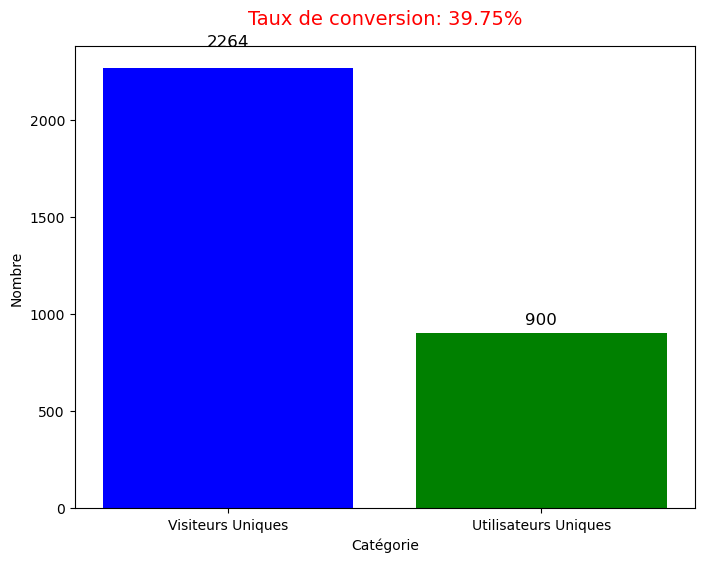

In [101]:
# Total de visiteurs uniques
nb_visiteurs = df['visitorId'].nunique()

# Total d'utilisateurs uniques
nb_utilisateurs = df['userId'].nunique()

# Taux de conversion
T_vu = nb_utilisateurs / nb_visiteurs

print(f"Taux de conversion visiteurs → utilisateurs : {T_vu:.2%}")

# Créer le graphique
labels = ['Visiteurs Uniques', 'Utilisateurs Uniques']
values = [nb_visiteurs, nb_utilisateurs]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('')
plt.ylabel('Nombre')
plt.xlabel('Catégorie')

# Affichage du taux de conversion sur le graphique
plt.text(0, nb_visiteurs + (nb_visiteurs * 0.05), f'{nb_visiteurs}', ha='center', fontsize=12)
plt.text(1, nb_utilisateurs + (nb_utilisateurs * 0.05), f'{nb_utilisateurs}', ha='center', fontsize=12)
plt.text(0.5, max(nb_visiteurs, nb_utilisateurs) + (max(nb_visiteurs, nb_utilisateurs) * 0.1), 
         f'Taux de conversion: {T_vu:.2%}', ha='center', fontsize=14, color='red')

plt.show()

Le **taux de conversion** mesure la part des visiteurs du site qui sont devenus des utilisateurs enregistrés. Il est calculé en divisant le nombre total d'**utilisateurs uniques** (`userId`) par le nombre total de **visiteurs uniques** (`visitorId`).

Pour ces données, le taux de conversion est de **39,75%**, ce qui signifie qu’environ **4 visiteurs sur 10** ont créé un compte.

## Taux de conversion utilisateurs → clients 

Taux de conversion utilisateurs → clients : 10.11%


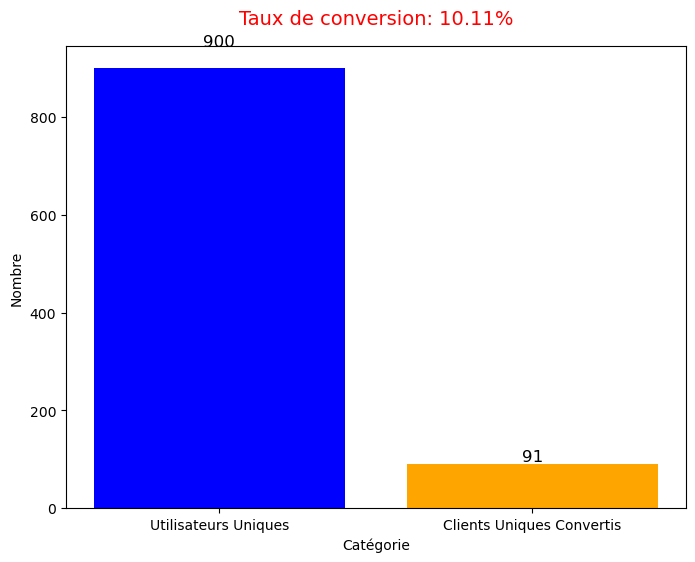

In [105]:
# Total de clients uniques converti
nb_clients = df.loc[df['visitConverted'] == 1, 'userId'].nunique()

# Taux de conversion
T_uc = nb_clients / nb_utilisateurs

print(f"Taux de conversion utilisateurs → clients : {T_uc:.2%}")

# Créer le graphique
labels = ['Utilisateurs Uniques', 'Clients Uniques Convertis']
values = [nb_utilisateurs, nb_clients]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Nombre')
plt.xlabel('Catégorie')

# Affichage
plt.text(0, nb_utilisateurs + (nb_utilisateurs * 0.05), f'{nb_utilisateurs}', ha='center', fontsize=12)
plt.text(1, nb_clients + (nb_clients * 0.05), f'{nb_clients}', ha='center', fontsize=12)
plt.text(0.5, max(nb_utilisateurs, nb_clients) + (max(nb_utilisateurs, nb_clients) * 0.1), 
         f'Taux de conversion: {T_uc:.2%}', ha='center', fontsize=14, color='red')

plt.show()

Le **taux de conversion utilisateurs → clients** indique la proportion d'**utilisateurs uniques** qui ont effectué au moins une conversion (achat, souscription, ou autre action définie comme une conversion).  

Il est calculé en divisant le nombre total de **clients uniques convertis** (`userId` avec `visitConverted = 1`) par le nombre total d'**utilisateurs uniques**.

Pour ce jeu de données, le taux de conversion est de **10,11%**, ce qui signifie qu’environ **1 utilisateur sur 10** est devenu client.

## Taux de conversion visiteurs → clients 

Taux de conversion visiteurs → clients : 4.02%


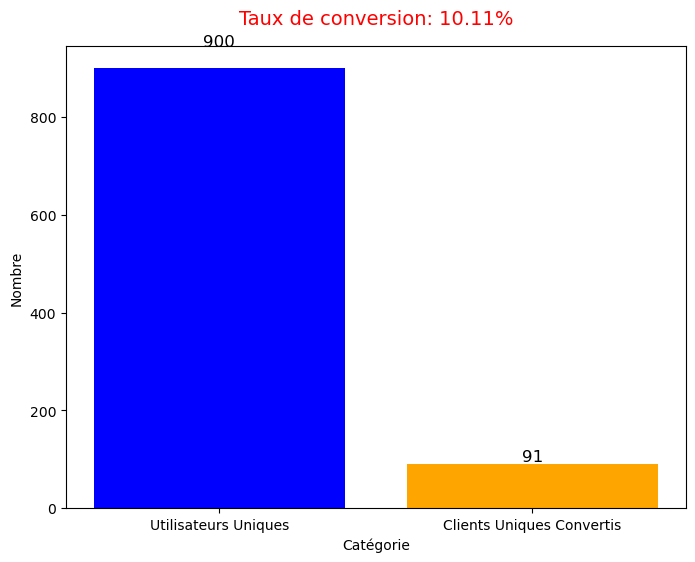

In [109]:
# Taux de conversion
T_vc = nb_clients / nb_visiteurs

print(f"Taux de conversion visiteurs → clients : {T_vc:.2%}")

# Créer le graphique
labels = ['Utilisateurs Uniques', 'Clients Uniques Convertis']
values = [nb_utilisateurs, nb_clients]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Nombre')
plt.xlabel('Catégorie')

# Affichage des valeurs sur les barres
plt.text(0, nb_utilisateurs + (nb_utilisateurs * 0.05), f'{nb_utilisateurs}', ha='center', fontsize=12)
plt.text(1, nb_clients + (nb_clients * 0.05), f'{nb_clients}', ha='center', fontsize=12)

# Affichage du taux de conversion
plt.text(0.5, max(nb_utilisateurs, nb_clients) + (max(nb_utilisateurs, nb_clients) * 0.1), 
         f'Taux de conversion: {T_uc:.2%}', ha='center', fontsize=14, color='red')

# Affichage du graphique
plt.show()

Le **taux de conversion visiteurs → clients** mesure la proportion de **visiteurs uniques** qui ont été jusqu'à réaliser une conversion.  

Ce taux est calculé en divisant le nombre total de **clients uniques convertis** par le nombre total de **visiteurs uniques**.

Dans notre cas, le taux de conversion est de **4,02%**, ce qui signifie qu'environ **4 visiteurs sur 100** finissent par devenir clients.

## Durée de l'engagement

In [201]:
# Durée d'engagement en secondes
engagementDuration = df['lastActionTimestamp'] - df['firstActionTimestamp']

# Convertir en heures, minutes et secondes
engagementDurationFormatted = engagementDuration.apply(lambda x: 
    f"{(x % 86400) // 3600} heures, {(x % 3600) // 60} minutes, {x % 60} secondes"
)

# Trier
engagementDurationFormatted = engagementDurationFormatted.sort_values(ascending=False)

# Afficher
print(engagementDurationFormatted.head(20))

4839    3 heures, 15 minutes, 12 secondes
964      2 heures, 5 minutes, 19 secondes
5970    2 heures, 48 minutes, 40 secondes
6833    2 heures, 48 minutes, 40 secondes
611     2 heures, 29 minutes, 27 secondes
879       1 heures, 9 minutes, 7 secondes
2303     1 heures, 8 minutes, 14 secondes
164       1 heures, 7 minutes, 8 secondes
3402     1 heures, 7 minutes, 47 secondes
1669     1 heures, 6 minutes, 35 secondes
877      1 heures, 5 minutes, 10 secondes
5524    1 heures, 47 minutes, 41 secondes
1078     1 heures, 4 minutes, 45 secondes
1332    1 heures, 38 minutes, 10 secondes
1348    1 heures, 37 minutes, 21 secondes
4537    1 heures, 36 minutes, 39 secondes
4456    1 heures, 36 minutes, 28 secondes
956      1 heures, 35 minutes, 2 secondes
108      1 heures, 32 minutes, 3 secondes
5351     1 heures, 3 minutes, 51 secondes
dtype: object


L'**engagementDuration** représente la durée totale de la période d’activités d’un utilisateur, c'est-à-dire la durée entre le premier et le dernier moment où l'utilisateur a interagi avec le site.

## Durée de la période de visites

In [205]:
# Durée d'apprentissage en secondes
learningDuration = df['secondsSinceFirstVisit'] - df['secondsSinceLastVisit']

# Convertir en heures, minutes et secondes
learningDurationFormatted = learningDuration.apply(lambda x: 
    f"{(x % 86400) // 3600} heures, {(x % 3600) // 60} minutes, {x % 60} secondes"
)

# Trier
learningDurationFormatted = learningDurationFormatted.sort_values(ascending=False)

# Afficher
print(learningDurationFormatted.head(20))

96        9 heures, 9 minutes, 9 secondes
392      9 heures, 9 minutes, 31 secondes
3578     9 heures, 7 minutes, 29 secondes
5947     9 heures, 7 minutes, 18 secondes
6810     9 heures, 7 minutes, 18 secondes
2508      9 heures, 6 minutes, 4 secondes
4112     9 heures, 59 minutes, 3 secondes
4115     9 heures, 59 minutes, 3 secondes
1239    9 heures, 56 minutes, 54 secondes
1218    9 heures, 56 minutes, 51 secondes
6396    9 heures, 56 minutes, 17 secondes
1851    9 heures, 55 minutes, 19 secondes
3997    9 heures, 54 minutes, 31 secondes
3533    9 heures, 53 minutes, 49 secondes
2397    9 heures, 53 minutes, 10 secondes
4097    9 heures, 51 minutes, 38 secondes
3975      9 heures, 5 minutes, 1 secondes
4441     9 heures, 49 minutes, 3 secondes
5055    9 heures, 43 minutes, 27 secondes
7054    9 heures, 43 minutes, 27 secondes
dtype: object


La **learningDuration** représente la durée totale de la période de la période durant laquelle un utilisateur reste actif sur le site. Ce qui peut être perçu comme la période pendant laquelle un utilisateur apprend, explore ou interagit avec le site.

## Durée d’une visite

In [156]:
# Durée en seconde
visitDuration = df['visitDuration']

# Formater en heures, minutes et secondes
visitDurationFormatted = visitDuration.apply(lambda x: 
    f"{(x % 86400) // 3600} heures, {(x % 3600) // 60} minutes, {x % 60} secondes"
)

# Trier
visitDurationFormatted = visitDurationFormatted.sort_values(ascending=False)

# Afficher les 200 plus grandes durées de visite
print(visitDurationFormatted.head(20))

4839    3 heures, 15 minutes, 13 secondes
964      2 heures, 5 minutes, 20 secondes
5970    2 heures, 48 minutes, 41 secondes
6833    2 heures, 48 minutes, 41 secondes
611     2 heures, 29 minutes, 28 secondes
879       1 heures, 9 minutes, 8 secondes
2303     1 heures, 8 minutes, 15 secondes
164       1 heures, 7 minutes, 9 secondes
3402     1 heures, 7 minutes, 48 secondes
1669     1 heures, 6 minutes, 36 secondes
877      1 heures, 5 minutes, 11 secondes
5524    1 heures, 47 minutes, 42 secondes
1078     1 heures, 4 minutes, 46 secondes
1332    1 heures, 38 minutes, 11 secondes
1348    1 heures, 37 minutes, 22 secondes
4537    1 heures, 36 minutes, 40 secondes
4456    1 heures, 36 minutes, 29 secondes
956      1 heures, 35 minutes, 3 secondes
108      1 heures, 32 minutes, 4 secondes
5351     1 heures, 3 minutes, 52 secondes
Name: visitDuration, dtype: object


La **visitDuration** représente la durée totale d'une visite sur le site. Elle mesure le temps écoulé entre le moment où un utilisateur commence une visite et le moment où il quitte la visite.

## Durée d'une action

In [224]:
# Sélectionner les colonnes des durées des actions
colonnes_actions = [f'timeSpent (actionDetails {n})' for n in range(218)]

# Calcul de la durée totale
df['totalActionDuration'] = df[colonnes_actions].sum(axis=1)

# Formater en heures, minutes et secondes
df['totalActionDurationFormatted'] = df['totalActionDuration'].apply(lambda x: 
    f"{(x // 3600)} heures, {(x % 3600) // 60} minutes, {x % 60} secondes"
)

# Trier
df_sorted = df.sort_values(by='totalActionDuration', ascending=False)

# Afficher
print(df_sorted['totalActionDurationFormatted'].head(20))

4839    3.0 heures, 15.0 minutes, 12.0 secondes
6833    2.0 heures, 48.0 minutes, 40.0 secondes
5970    2.0 heures, 48.0 minutes, 40.0 secondes
611     2.0 heures, 29.0 minutes, 27.0 secondes
964      2.0 heures, 5.0 minutes, 19.0 secondes
5524    1.0 heures, 47.0 minutes, 40.0 secondes
1332     1.0 heures, 38.0 minutes, 9.0 secondes
1348    1.0 heures, 37.0 minutes, 21.0 secondes
4537    1.0 heures, 36.0 minutes, 39.0 secondes
4456    1.0 heures, 36.0 minutes, 28.0 secondes
956      1.0 heures, 35.0 minutes, 2.0 secondes
108      1.0 heures, 32.0 minutes, 3.0 secondes
4636    1.0 heures, 24.0 minutes, 58.0 secondes
5248    1.0 heures, 23.0 minutes, 35.0 secondes
734      1.0 heures, 17.0 minutes, 2.0 secondes
2138    1.0 heures, 15.0 minutes, 36.0 secondes
3940    1.0 heures, 15.0 minutes, 35.0 secondes
4525    1.0 heures, 11.0 minutes, 55.0 secondes
6088    1.0 heures, 11.0 minutes, 17.0 secondes
6951    1.0 heures, 11.0 minutes, 17.0 secondes
Name: totalActionDurationFormatted, dtyp

Le tableau ci-dessus présente les 20 plus grandes durées cumulées d'actions effectuées par les utilisateurs lors de leurs visites. 

## Réactivité

In [12]:
# Calcul
reactivity = df['firstActionTimestamp'] - (df['serverTimestamp'] - df['secondsSinceFirstVisit'])

# DataFrame avec fingerprint et réactivité
reactivity_df = pd.DataFrame({
    'fingerprint': df['fingerprint'],
    'reactivity_seconds': reactivity
})

# Formater
reactivity_df['reactivity_formatted'] = reactivity_df['reactivity_seconds'].apply(
    lambda x: (
        f"-{abs(x) // 3600} heures, {(abs(x) % 3600) // 60} minutes, {abs(x) % 60} secondes"
        if x < 0 else
        f"{x // 3600} heures, {(x % 3600) // 60} minutes, {x % 60} secondes"
    )
)

# Trier
reactivity_df = reactivity_df.sort_values(by='reactivity_seconds', ascending=False).reset_index(drop=True)

# Afficher 
print(reactivity_df.head(10))

        fingerprint  reactivity_seconds                  reactivity_formatted
0  2fe722984943d0d3            18148870  5041 heures, 21 minutes, 10 secondes
1  2fe722984943d0d3            18148862   5041 heures, 21 minutes, 2 secondes
2  bf92faa6a84e4a95            17910580   4975 heures, 9 minutes, 40 secondes
3  bf92faa6a84e4a95            17910580   4975 heures, 9 minutes, 40 secondes
4  88fe567870f40b28            17871328  4964 heures, 15 minutes, 28 secondes
5  88fe567870f40b28            17871328  4964 heures, 15 minutes, 28 secondes
6  3ecc59ea59c9118c            17603694  4889 heures, 54 minutes, 54 secondes
7  3ecc59ea59c9118c            17603694  4889 heures, 54 minutes, 54 secondes
8  dc65d1e994f990ea            17569818  4880 heures, 30 minutes, 18 secondes
9  dc65d1e994f990ea            17569818  4880 heures, 30 minutes, 18 secondes


In [26]:
# Calcul début visite 
visit_start_time = df['serverTimestamp'] - df['secondsSinceFirstVisit']

# Calcul de la réactivité
reactivity_v2 = df['timestamp (actionDetails 0)'] - visit_start_time

# Formater
reactivity_formatted = reactivity_v2.apply(lambda x: 
    f"{x // 3600} heures, {(x % 3600) // 60} minutes, {x % 60} secondes" if x >= 0 else "Valeur négative")

# Affichage pour chaque individu
reactivity_df = df[['fingerprint']].copy()  # Conserver uniquement le fingerprint pour identifier l'individu
reactivity_df['reactivity'] = reactivity
reactivity_df['reactivity_formatted'] = reactivity_formatted

# Trier 
reactivity_df = reactivity_df.sort_values(by='reactivity', ascending=True).reset_index(drop=True)

# Afficher
reactivity_df.head(100)

,fingerprint,reactivity,reactivity_formatted
0,da53cf6a68bf2e7a,-2290,Valeur négative
1,71e4892e3144be1c,-231,Valeur négative
2,b4cb0000d7eb51d0,-152,Valeur négative
3,a7830aed8095d0bc,-103,Valeur négative
4,11ba5b89b2d04093,5,"0 heures, 0 minutes, 5 secondes"
...,...,...,...
95,f29c38d1aceff80f,2358,"0 heures, 39 minutes, 18 secondes"
96,6264b742dcdd5bac,2381,"0 heures, 39 minutes, 41 secondes"
97,8dfdc753da6ef09b,2405,"0 heures, 40 minutes, 5 secondes"
98,cbc70c00acec6c8a,2419,"0 heures, 40 minutes, 19 secondes"


Le délai entre le début de la visite d'un utilisateur et sa première action effectuée sur le site.

## Récence

In [50]:
# Calcul de la récence en secondes
recency = df['lastActionTimestamp'] - (df['serverTimestamp'] - df['secondsSinceLastVisit'])

# Formater la récence en heures, minutes, secondes
recency_formatted = recency.apply(lambda x: f"{(x // 3600)} heures, {(x % 3600) // 60} minutes, {x % 60} secondes")

recency_formatted_v2 = recency.apply(lambda x: f"{(x // 3600)} heures, {(x % 3600) // 60} minutes, {x % 60} secondes")

# Affichage des résultats triés par récence décroissante
df_sorted_recency = df.assign(recency=recency, recencyFormatted=recency_formatted).sort_values(by='recency', ascending=False)

df_sorted_recency_v2 = df.assign(recency=recency, recencyFormatted_v2=recency_formatted_v2).sort_values(by='recency', ascending=True)

# Affichage des 10 premiers résultats
print(df_sorted_recency[['fingerprint', 'recencyFormatted']].head(10))

print(df_sorted_recency_v2[['fingerprint', 'recencyFormatted_v2']].head(3000))

           fingerprint                      recencyFormatted
1262  dd21ec50d336e731   3623 heures, 11 minutes, 4 secondes
4088  8f6f5408833027c0   3115 heures, 1 minutes, 31 secondes
527   7d32f5c84f899177   3050 heures, 3 minutes, 42 secondes
325   6b177dd034163f19  2918 heures, 59 minutes, 29 secondes
1078  45e1836cc398cca6  2906 heures, 18 minutes, 46 secondes
731   e9e32e91308d4beb  2809 heures, 32 minutes, 27 secondes
840   4af0eae4e9a08443   2695 heures, 8 minutes, 32 secondes
412   840f6688772d816d   2650 heures, 8 minutes, 57 secondes
701   c85ff6b95f241e3f   2495 heures, 8 minutes, 44 secondes
743   53fe169dbb09de90    2488 heures, 0 minutes, 6 secondes
           fingerprint                recencyFormatted_v2
22    e11f4b166e9d44a8    0 heures, 0 minutes, 0 secondes
116   e6ec957f3d08495a    0 heures, 0 minutes, 0 secondes
118   9aeb0ce375029ea7    0 heures, 0 minutes, 0 secondes
119   c58795c1fa9077d5    0 heures, 0 minutes, 0 secondes
121   076a378ba0783636    0 heures, 0 m

Temps écoulé entre la dernière action effectuée par un utilisateur et sa dernière visite sur le site

## Concentration

In [76]:
# Calcul
concentration = (reactivity + recency) - df['pageLoadTimeMilliseconds (actionDetails 0)']

# Formater
concentration_formatted = concentration.apply(lambda x: f"{(x // 3600)} heures, {(x % 3600) // 60} minutes, {x % 60} secondes")

# Affichage
df_sorted_concentration = df.assign(concentration=concentration, concentrationFormatted=concentration_formatted).sort_values(by='concentration', ascending=True)

# Affichage
print(df_sorted_concentration[['fingerprint', 'concentrationFormatted']].head(600))


           fingerprint                     concentrationFormatted
2750  411104f08748c5c6   -41.0 heures, 47.0 minutes, 6.0 secondes
2036  1ed4d003ad96cbb5  -25.0 heures, 21.0 minutes, 44.0 secondes
984   a4be0995c5323d8c  -13.0 heures, 55.0 minutes, 15.0 secondes
3142  66c9eabb2e9aeb7e   -11.0 heures, 5.0 minutes, 29.0 secondes
5404  e7995e4655cd58a2   -10.0 heures, 8.0 minutes, 50.0 secondes
...                ...                                        ...
2125  9523593fe56b76db     0.0 heures, 2.0 minutes, 57.0 secondes
5608  afbfab431ff8fcd6     0.0 heures, 2.0 minutes, 58.0 secondes
1636  9dbd499ffa3eca40      0.0 heures, 3.0 minutes, 0.0 secondes
1648  a5440da2fb0184ca      0.0 heures, 3.0 minutes, 0.0 secondes
2330  99d2ea44f33c195d      0.0 heures, 3.0 minutes, 6.0 secondes

[600 rows x 2 columns]
